# Homework (15 pts) - Maximum Likelihood Estimation

In [1]:
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import matplotlib.pyplot as plt

# matplotlib configuration
import matplotlib as mpl
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
mpl.rcParams["legend.fontsize"] = 12
# retina display only (e.g. MacOS)
%config InlineBackend.figure_format = 'retina'

You measure current through a single ion channel at regular sample intervals. The observed distribution of current amplitudes are given below in the `current_pA` array. The following questions #1-5 refer this data. 

In [22]:
import numpy as np
# current (pA) for a single ion channel
current_pA = np.array([ 9.46547130e-02,  1.02907617e+00, -1.96303294e-02, -4.28438274e-01,
        2.32131969e-01, -1.19660902e+00, -9.19843456e-01, -5.76712602e-01,
        1.39082558e-01,  3.82218250e-01,  1.32239278e+00,  2.32855809e-01,
        2.56229254e-01, -1.39347028e+00, -5.33281910e-01, -7.32530325e-01,
       -2.94326133e-01,  2.44002070e-01, -3.19405855e-01, -3.84959441e-01,
        4.02421029e-01,  1.09639652e-01,  6.92162823e-01, -8.54975683e-01,
       -9.11795381e-01, -5.88017698e-01,  3.94035087e-01,  2.23598444e+00,
       -2.19037764e-01,  3.63230069e-01, -5.58512651e-01,  2.39773230e-01,
       -6.38643973e-01,  7.21731956e-01,  1.01062053e-01, -5.11317207e-01,
       -6.32043086e-01,  9.46361167e-01, -3.36063800e-01,  9.02592565e-02,
        7.44303501e-01,  3.13116924e-01,  5.66969354e-01,  4.12342296e-01,
       -4.39251328e-01,  4.58103748e-01,  2.62405829e-01,  1.14046179e-01,
       -5.46705894e-01, -5.40680879e-01, -2.32702481e-01,  1.00604924e+00,
        8.72363238e-01, -1.15971781e-01,  3.90450077e-01, -3.75587262e-01,
        8.73903369e-01, -6.60447360e-01, -1.14794224e+00,  2.54556517e-02,
       -1.41696639e-01, -3.54855413e-01,  1.79193098e-01,  1.91447769e-01,
       -2.60441616e-01,  2.87249056e-01, -5.35514752e-01,  8.99760736e-01,
        1.05975104e+00, -2.46488325e-01,  5.36368137e-01, -3.87503616e-01,
        1.21175149e+00,  9.10453877e-01,  6.02818376e-01,  7.34867246e-01,
        1.16894303e-01,  4.94117622e-01, -3.88769978e-01,  8.37000241e-01,
       -5.63242620e-01, -9.05540221e-01, -1.28740270e-01,  4.93212415e-01,
        2.49885711e-01, -1.35642900e-01, -2.94571817e-01, -2.33426573e-01,
        4.30402177e-01, -7.61233406e-02, -6.98866718e-01,  2.33306924e-01,
        1.50983776e-01,  8.82335077e-02,  4.70898572e-01,  3.07183940e-01,
       -2.82196996e-01,  1.04179000e+00,  8.41684015e-01, -4.30078753e-01,
       -8.90766982e-01, -8.98173579e-02,  8.41184587e-01,  5.81932223e-02,
       -2.67328988e-01, -1.58483844e-01, -6.70531635e-01, -3.52185183e-01,
       -6.83023839e-01, -9.30135029e-01, -1.58677455e+00, -1.64248845e-01,
        2.44267397e-01,  1.21066412e+00,  5.15876959e-02, -1.04463796e+00,
        1.53814562e-01,  1.00219953e+00,  7.08079086e-01,  3.62238086e-01,
       -7.71135915e-01,  4.34071270e-02, -3.23491225e-01, -1.24584989e+00,
        4.44040239e-02,  5.95880445e-01,  1.33672112e+00, -4.83131435e-01,
       -1.35770831e+00, -3.89039361e-01,  3.32893367e-01, -7.34055680e-01,
        8.72007018e-02, -3.87540369e-01, -3.77050803e-01,  1.77745159e-01,
       -2.08159855e-01,  1.73962873e-01, -6.43644613e-01, -6.46166593e-01,
        1.26833851e+00,  5.68318277e-01, -5.16063812e-02, -6.73483952e-01,
       -1.17356108e+00,  1.63024496e-01, -1.55427368e+00, -1.06410899e+00,
       -4.37211587e-01, -7.66780106e-02, -1.59977153e-01,  5.85945013e-01,
       -8.23683199e-01, -3.13722300e-01, -6.64880948e-01, -2.71773342e-01,
       -3.63310588e-01,  9.02836123e-01, -5.71111542e-01, -3.92039150e-01,
       -5.02139711e-02, -1.68205749e-01,  4.00767856e-01,  7.12503944e-01,
        5.70865498e-01, -7.43624166e-01,  4.67592406e-02, -2.76559589e-02,
        3.59879963e-01,  1.49666946e-01,  1.02236622e+00,  3.02099315e-01,
        8.61864492e-01, -5.68737978e-01,  1.20377474e-01, -1.52689110e+00,
        1.74032922e+00,  3.93270350e-01, -7.18645958e-01,  6.29595791e-02,
       -3.75098044e-01,  5.52065624e-01, -2.54424088e-01, -4.89507871e-02,
       -1.46475999e-01, -7.85977754e-01,  1.03408665e-01,  1.31056310e+00,
        1.76088227e-01, -3.20597930e-01, -8.42111580e-01, -1.19678644e-01,
       -1.10112964e+00,  6.64696321e-01, -1.89233384e+00, -1.01789012e+00,
       -1.23338513e-01, -2.14783954e-01,  4.46394096e-01,  5.42477274e-01,
       -8.28333967e-01,  1.76864594e+00, -2.02442831e-01,  1.16121063e+00,
       -1.19443194e+00, -8.08833526e-01,  5.32075952e-01, -2.63599245e-01,
        3.18048410e-01,  2.21998545e-01,  4.23837001e-01, -1.00136822e-01,
       -5.77084835e-01,  4.29182844e-01, -4.51417623e-01,  5.37335891e-02,
        7.41702017e-01,  3.03943108e-01,  3.11609254e-01, -1.29098952e+00,
        1.46813730e+00, -2.17024774e-01, -7.10942108e-01,  4.09076403e-02,
        3.79485106e-01,  6.54484409e-01, -1.31352373e-02,  1.29405071e-01,
       -2.57611039e-01,  9.81426729e-01,  3.40609670e-01,  4.32640371e-01,
       -1.73755828e-01, -5.70993833e-01, -7.46644569e-01,  2.74432072e-01,
        2.77072692e-01, -6.76841701e-01, -5.85591093e-02, -6.83314689e-01,
       -4.61206325e-01, -8.03866697e-01, -4.33287081e-01,  2.01626007e-01,
        1.87126930e-01, -6.99774725e-01, -9.52391849e-01,  4.26983644e-01,
        7.39072006e-01,  2.23831182e+00,  6.78920026e-01,  2.10497036e-01,
       -4.14941830e-01,  3.08721124e-01, -2.35022083e-01,  8.30462368e-01,
       -1.08911649e-01, -5.19328344e-01, -4.09555936e-02,  4.92254774e-01,
       -6.76653466e-01, -2.28591952e-01, -1.12747735e+00,  1.14744228e+00,
       -2.19676072e-01, -7.88228028e-01, -6.58500049e-01, -6.60395300e-01,
        8.97277495e-01,  1.33830732e+00, -4.81162622e-01,  4.48470399e-01,
       -9.90829916e-01, -3.89417827e-02, -5.84207389e-02, -2.52315415e-01,
       -9.01896171e-02,  1.18169491e+00, -7.58138447e-01,  2.31429109e-01,
       -4.78570840e-01, -1.81312164e-01,  2.39043885e-01,  1.09679049e+00,
        1.05559983e+00, -1.06523918e+00, -2.36153294e-01, -8.47177656e-02,
        6.63299636e-01, -4.95243307e-01,  1.26371588e+00,  3.88456886e-01,
       -5.03462134e-01,  7.24107721e-01,  1.51799200e-01,  5.96614547e-01,
        9.94709736e-01,  2.43167935e-01, -6.56159345e-01,  7.63539254e-02,
        9.37031792e-01, -2.57441276e-01, -7.06202900e-01,  8.98414218e-01,
       -3.70963089e-01, -3.89302701e-01,  1.60092376e-01,  3.77157314e-01,
        6.25868214e-01, -7.02296228e-01, -1.21964983e-01,  1.11037271e-01,
        7.60334146e-01, -1.01786220e-01, -1.21262350e+00, -3.40082646e-01,
       -5.83520825e-01,  5.04821614e-01, -1.99641659e+00, -5.36900041e-01,
        7.80043906e-01,  1.09766624e+00, -8.49955871e-03,  9.04228388e-03,
        2.04642804e-01,  6.69986941e-01, -9.35654772e-01, -2.45163874e-02,
        2.13598427e-01,  7.82104508e-02, -5.10465576e-01, -3.33145083e-01,
        8.03535647e-03,  6.28640876e-01,  2.68994867e-01, -1.09429553e+00,
       -6.72286685e-01, -1.08408843e+00,  1.02220962e+00, -1.67039044e-01,
        2.37526245e+00, -1.02044535e-01, -2.88731524e-01, -3.55090352e-01,
        3.10321818e-01,  1.52809025e+00, -1.31511125e+00,  3.27513905e-01,
        1.62043787e+00, -3.97458947e-01, -3.11871347e-01, -1.32468318e+00,
        1.50992674e-01,  1.08405314e+00,  3.34557076e-01, -1.16945666e-01,
       -2.86124044e-01, -4.77490678e-01, -3.80118139e-01, -1.53998856e-01,
        1.54587085e-01,  1.23811391e+00,  2.02605630e+00, -9.66179876e-02,
       -1.74678463e-01,  2.50687721e-01, -3.09228056e-02, -9.42997021e-01,
        4.10346913e-01,  1.61399682e-01, -3.91147448e-01,  1.84321032e-01,
       -3.71906619e-01, -4.00534759e-01,  8.93346131e-01,  1.43059944e-01,
       -3.42178396e-01, -3.34390929e-02, -4.09238801e-01, -5.15826154e-02,
       -9.89790033e-03, -1.45510014e-02,  2.37238118e+00, -2.11366420e-01,
       -1.09246345e-01, -9.71138952e-01, -9.74337874e-02, -1.53139920e+00,
       -2.31995736e-01, -1.39232612e-01, -4.21160098e-01, -4.96485361e-01,
       -1.56162039e+00,  4.18203180e-01,  9.90477138e-01, -2.20137075e-01,
        9.43397141e-02,  5.70338706e-01,  7.55541300e-01, -8.21509044e-01,
        3.16798131e-01, -4.51402462e-01,  3.05148426e-01,  9.97930468e-02,
        5.24345573e-01,  1.15192731e+00,  1.15997170e+00,  1.68897937e-01,
        1.20322296e+00, -5.56224970e-02,  1.58856901e-01,  5.36338045e-01,
        4.13753668e-01,  8.37016056e-01,  2.25319222e-01,  4.47367096e-01,
       -5.61945656e-02, -3.33517871e-01, -8.37953330e-01,  9.65556159e-01,
        4.11100333e-01,  2.83778328e-02, -2.21189617e-01,  3.70479910e-01,
        6.98211525e-01,  1.43892007e+00, -4.86641950e-01,  8.14243974e-01,
        5.74156862e-01, -2.74831795e-01, -6.33629930e-01,  3.56413226e-01,
        3.86305529e-02, -4.26859373e-01,  7.74088197e-02,  2.12995257e-01,
       -5.89757356e-01, -4.24885852e-01,  1.70210871e-01,  1.36041269e-01,
        3.62771306e-01, -3.03105507e-02, -1.06544309e-01, -2.62569827e-01,
        1.35500273e-01, -4.43967363e-02, -1.08374613e+00, -1.20587620e+00,
        6.38923297e-01,  6.27950227e-01, -7.58581360e-01,  1.11197630e-01,
       -1.61860892e-01,  1.19418111e+00,  5.09330911e-01, -3.57770681e-01,
       -2.40269628e-01,  1.25950165e-01,  1.14306366e-01,  6.08579520e-01,
        5.27963120e-01,  3.32113208e-03, -1.27089901e+00,  8.60752216e-02,
        1.87113021e-01,  1.01851079e+00, -4.89644924e-01, -6.54757538e-01,
        4.79036681e-01, -5.29614351e-01,  8.29795685e-01, -3.92798339e-01,
       -1.38445739e+00,  5.13018665e-01,  5.88541263e-01,  1.03190477e+00,
       -3.14320999e-01,  7.47342546e-01, -9.54478744e-01, -7.71625196e-01,
        5.96192462e-01, -6.42316932e-01,  6.06116576e-01, -7.91344098e-01,
        1.74317390e-01,  1.07802559e-01,  8.88945448e-01,  1.77279583e-02,
        3.11184901e-01,  1.29354755e+00,  1.83001866e+00,  1.26224265e-01,
        1.79767004e-01,  9.53830983e-01, -9.89199375e-01,  1.69335249e+00,
        1.62322623e-02,  1.14157743e+00,  4.79668760e-01, -1.30587993e+00,
       -2.46416624e-01,  8.77697826e-01, -3.64543468e-02, -3.32638626e-01,
        8.17058543e-01, -2.74305279e-01,  7.89048592e-01,  9.27024385e-01,
        4.52872758e-01, -6.24142876e-02, -2.57349566e-01,  1.81561963e-01,
        8.75877748e-01, -2.06022130e-01, -1.54409710e-01, -1.02821563e+00,
       -7.71237219e-01, -6.47153030e-01, -2.92744111e-01,  6.53375392e-01,
        1.46668926e-01,  7.93976239e-01, -5.73354568e-01, -5.01751585e-01,
        3.78640692e-01,  5.97722808e-02,  2.07401201e-01, -6.21360968e-02,
        4.01085834e-01, -1.47695110e-01,  1.08158126e+00, -4.00950236e-01,
       -6.39159490e-01,  3.80086284e-01,  3.83405785e-01, -1.76081077e-01,
        1.42966430e+00,  1.24056861e+00, -1.21040035e-01,  7.71797849e-01,
       -1.21453191e+00,  2.09832051e-01,  8.56517040e-01,  1.50712541e-01,
        1.28788522e-01,  1.57494332e-01, -7.58529417e-01,  5.44995183e-01,
       -4.02702476e-01,  3.89622670e-01, -1.82815762e+00,  2.73178751e-01,
        1.74385483e+00, -8.96609098e-01,  6.29512610e-01, -7.54567205e-01,
       -9.54350951e-01, -5.42198304e-01, -2.72943327e-01,  5.74151817e-01,
        3.86597581e-01, -3.98413735e-02,  4.53431706e-01,  1.50743037e-01,
        3.91164198e-01,  7.66660790e-01, -9.14474555e-01, -3.10486430e-01,
        7.85941987e-01, -1.05694348e+00, -3.07104982e-01,  7.01615967e-01,
       -7.99242470e-01, -4.84973789e-01, -4.41686279e-03,  5.08203384e-01,
       -5.71632349e-01,  2.67677225e-01, -1.29683036e+00,  1.61988469e+00,
       -4.69721101e-01,  2.08532321e-01, -1.05608132e+00,  8.02302239e-01,
        4.77244507e-01,  8.90236873e-01, -1.14851394e-01,  4.20977783e-01,
        2.07701173e-01,  6.37690608e-01, -3.68363683e-01, -5.73107131e-01,
        3.89380967e-02, -6.66182649e-01, -5.88873775e-01, -3.24683217e-01,
        1.42271048e-01, -5.75357029e-01, -5.77191421e-02, -4.49049717e-01,
        1.06261197e+00, -6.32912425e-01,  4.95788762e-02, -1.65019835e-01,
        3.26309233e-01,  9.36197629e-01, -3.45148141e-01, -1.73138261e-01,
        1.15613479e-02, -3.96467653e-01, -4.60690029e-01, -2.18684650e-01,
        2.70566475e-01,  3.76912620e-01,  1.31511431e-01, -1.10416576e-01,
        3.98011228e-01, -1.19416752e+00,  1.04974592e-01, -8.01165669e-01,
        7.68707977e-01,  6.37080857e-01,  2.65008536e-01, -2.58380520e-01,
       -1.25984900e+00, -4.51453955e-01,  1.96685566e-01,  1.07052223e-01,
       -1.80333873e-01, -2.51580634e-01, -4.20303281e-01,  4.55430680e-01,
       -4.90719670e-01, -6.63977067e-01, -4.99404762e-01,  1.20368843e+00,
        1.51530846e-01,  3.80202121e-01, -2.75192742e-01,  6.48940893e-02,
       -1.71635577e-01,  1.48137220e-01, -6.90683425e-01,  5.66766721e-02,
       -5.84022102e-01, -4.92516657e-01, -4.55552820e-01,  4.63312971e-01,
       -2.21172523e-01,  7.86987660e-01,  1.72398871e-01,  2.30332891e-01,
       -7.16634363e-01,  4.17915701e-01,  5.55960905e-01,  1.67369219e-01,
        4.49578663e-01, -6.08913159e-01,  7.24761827e-01, -4.32433923e-01,
        1.06281660e+00, -2.82381161e-01,  1.07413595e-01, -1.02574880e-01,
       -5.44274841e-01, -1.17214545e+00, -1.07712601e+00, -4.84982652e-01,
        3.44202251e-01,  1.70070959e+00,  6.75120060e-01, -7.73168071e-01,
        3.52436581e-01,  5.01975059e-02, -4.36507023e-02, -9.12161140e-01,
        1.29526537e+00,  7.00040634e-01,  2.93068906e-01,  3.18010609e-02,
        1.17282500e+00,  1.17474864e+00,  1.03635739e+00,  1.22625874e-01,
        6.15507078e-01,  4.03752419e-01,  3.11469340e-01,  1.57558192e+00,
        4.26950541e-01, -1.17262278e-01, -5.16200415e-01, -3.58139279e-01,
       -1.09977574e+00, -1.23245977e+00,  1.92325964e-01, -4.94762053e-01,
        1.19113861e+00, -1.30729979e+00,  3.37311852e-01,  1.25478419e+00,
        1.95772194e+00,  1.35685590e+00,  1.83648479e+00,  1.71351472e+00,
        3.94062562e+00,  3.78366422e+00,  9.14476337e-01,  2.70866964e+00,
        3.76286468e+00,  2.83563204e+00,  1.87273042e+00,  2.00385784e+00,
        3.43306720e+00,  3.66608337e+00,  1.20904743e+00,  1.29500204e+00,
        1.89097131e+00,  2.50923176e+00,  1.49410009e+00,  2.56785305e+00,
        8.25170520e-01,  1.06091563e+00,  9.87591715e-01,  1.11745887e+00,
        9.41760990e-01,  1.23329583e+00,  1.54561889e+00,  2.48908228e+00,
        1.51039934e+00,  2.86181157e+00,  3.30925292e+00, -1.75217222e-01,
        3.13970438e+00,  3.22824770e+00,  1.25400568e+00,  2.42099991e+00,
        1.93433186e+00,  2.25059622e+00,  3.44261720e+00,  1.10404584e+00,
        4.15104960e-01,  3.67630079e-01,  1.50394333e+00,  1.17972585e+00,
        1.78563042e+00,  9.30543623e-01,  3.58637303e+00,  9.04486539e-01,
        1.82016477e+00,  3.17333412e+00,  3.39099168e+00,  2.35239551e+00,
        2.71168929e+00,  2.53982451e+00,  2.37207775e+00,  3.16011473e+00,
       -7.54381346e-01,  5.18424514e-01,  2.37780252e+00,  2.74197332e+00,
       -5.33434323e-01,  2.39618721e+00,  2.98094792e+00,  2.05492707e+00,
        2.30192565e+00,  2.39818971e+00,  1.16061800e+00,  1.16680629e+00,
        1.15690989e+00,  3.57049696e+00,  1.90298033e+00,  1.49532871e+00,
        2.01628035e+00,  1.92357694e+00,  1.24945721e+00,  2.56329875e+00,
        1.79259008e+00,  3.00103344e+00,  7.81769704e-01,  3.32142897e+00,
        2.83232800e+00,  7.13949718e-01,  2.14260196e+00,  3.68664182e+00,
        3.23405198e+00,  8.03721999e-01,  2.40967516e+00, -1.26526261e-01,
        1.66178938e+00,  1.05452060e+00,  1.87252524e+00,  2.62458432e+00,
        2.60719653e+00,  2.42011078e+00,  2.44012769e+00,  2.82351973e+00,
        2.04208434e+00,  2.10241264e+00,  1.92239925e+00,  2.28597695e-01,
        4.32701403e-01,  3.23725182e+00, -7.51217227e-01,  1.09627311e+00,
        2.00718865e+00,  1.42665552e+00,  1.76872130e+00,  2.53357832e+00,
        2.03164963e+00,  2.37422392e+00,  2.67727930e+00, -1.00974756e+00,
        1.52838003e+00,  1.81896491e+00,  1.62685472e+00,  2.31558159e+00,
        4.02006882e+00,  1.74025342e+00,  2.93641792e+00,  2.08287249e+00,
        2.79869514e+00,  1.60200050e+00,  1.64117619e+00,  2.73164537e+00,
        1.75322676e+00,  1.40017618e+00,  7.89229829e-01,  1.98472633e+00,
        1.23838676e+00,  1.45252754e+00,  1.52192868e+00,  1.89153930e+00,
        2.73993783e+00,  1.89647930e+00,  3.47749984e+00,  1.85649445e-01,
        1.82981046e+00, -4.49446802e-01,  3.58237830e+00,  1.75875377e+00,
        7.51816752e-01,  1.32166920e+00,  2.17072627e+00,  1.06748559e+00,
        1.82274486e+00,  1.77905493e+00,  2.23645262e+00,  1.35029711e+00,
        4.13083326e+00,  3.49038259e+00,  1.59707665e+00,  2.97512024e+00,
        2.94226315e+00,  1.31134192e+00,  3.75332133e+00,  2.89326206e+00,
        1.52428610e+00,  2.94184995e+00,  2.86238328e+00,  3.05460437e+00,
        3.30418841e+00,  2.70980699e+00,  3.29716213e+00,  4.32867697e+00,
        1.04030998e+00,  2.12796509e+00,  1.71139806e+00,  1.29453134e+00,
        1.46764861e+00,  2.38069071e+00,  2.62994414e+00,  3.06695335e+00,
        2.28954628e+00,  1.28625200e+00,  2.74225054e+00,  4.42999681e+00,
        1.15041699e+00,  2.60711708e+00,  1.92397054e+00,  2.09494594e+00,
        1.89780990e+00,  2.52276185e+00,  1.06002262e+00,  1.88857192e+00,
        2.06708502e+00,  1.63550092e+00,  2.69536656e+00,  5.91023844e-01,
        2.87781257e+00,  1.66718983e+00,  2.53203805e+00,  2.53694805e+00,
        2.31012676e+00,  2.33651426e+00,  1.49562952e+00,  5.10637483e-02,
        2.71257617e+00,  1.94226545e+00,  1.31549982e+00,  1.70226909e+00,
        3.08858523e+00,  2.28806076e+00,  1.88710512e+00,  2.11703822e+00,
        4.87160333e-01,  2.78191204e+00,  2.29782843e+00,  1.76249708e+00,
        1.81074400e+00,  2.32358622e+00,  9.21626597e-01,  2.56418977e+00,
        1.81613095e+00,  2.21592270e+00,  1.17982155e+00,  1.84713990e+00,
        1.34685180e-01,  3.04155976e+00,  3.03981432e+00,  1.17479071e+00,
        1.03923062e+00,  5.59769748e-01,  2.23757225e+00,  1.99043581e+00,
        4.24010460e+00,  3.03273451e+00,  7.27378203e-01,  3.97346973e+00,
        1.74848315e+00,  1.97792367e+00,  1.56551967e+00,  1.58885771e+00,
        1.12698385e+00,  3.02044416e+00,  2.93645245e+00,  2.23474845e+00,
        4.28053399e+00,  2.85619030e+00,  2.84288563e+00,  1.36955693e+00,
        3.21508565e-01,  2.40925671e+00,  1.61808835e+00,  2.99891592e+00,
        2.08457057e+00,  1.72156313e+00,  2.22073341e+00,  2.23717122e+00,
        3.06479847e+00,  1.07104115e+00,  1.97448739e+00,  1.70132182e+00,
        1.81171707e+00,  2.62422838e+00,  2.00428124e+00,  1.39071397e+00,
        4.15420723e+00,  1.54031827e+00,  4.75522242e-01, -1.10958663e-01,
        1.06140376e+00,  2.44792089e+00,  2.68745284e+00,  3.48266692e+00,
        2.77275211e+00,  1.67970492e+00,  2.65781466e+00,  2.31804994e+00,
        2.40688030e+00,  2.05947631e+00,  3.05145225e+00,  1.45173492e+00,
        1.97051672e+00,  1.56607362e+00,  2.32704860e+00,  4.36291400e-01,
        2.74652774e+00,  1.40003435e+00,  3.16776635e+00,  1.22505559e+00,
        1.01471668e+00,  1.95727260e+00,  3.20210818e+00,  3.13175995e+00,
        2.57356661e+00,  2.57437530e+00,  3.70349785e-01,  6.46423676e-01,
        9.71077332e-01,  1.04263637e+00,  8.38254848e-01,  2.05702738e+00,
        1.55538239e+00,  9.01529423e-01,  4.54003040e+00,  4.29102672e+00,
        3.36455650e+00,  1.42489558e+00,  3.54426271e+00,  1.92953842e+00,
        2.33456027e+00,  1.55172176e+00,  1.10649666e+00,  1.80059774e+00,
        2.49246049e+00,  1.30248450e+00,  3.99519119e-01,  2.29048090e+00,
        1.74257366e+00,  3.72147454e+00,  3.83398764e+00,  2.91676744e+00,
        3.30401611e+00,  2.32272241e-01,  1.81432641e+00,  3.20826010e+00,
        2.40297965e+00,  2.62573596e+00,  1.14967845e+00,  1.27303360e+00,
        4.08980694e+00,  2.29612497e+00,  1.91487494e+00,  3.97845749e+00,
       -5.39529357e-03,  3.26962044e+00,  3.03758641e+00,  2.98822962e+00,
        2.80246471e+00,  2.62671342e+00,  6.84460414e-01,  8.31907408e-01,
        3.24143171e+00,  2.78939198e+00, -1.72800115e-01,  2.29879523e+00,
        1.12667246e+00,  3.72365094e+00,  9.48322113e-01,  2.46932967e+00,
        3.13832497e+00,  3.23662088e+00,  1.66464669e+00,  2.83816926e+00,
        3.50612223e+00,  6.39367947e-01,  3.53052659e+00,  1.94583035e+00,
        2.86342304e+00,  3.29167688e+00,  2.28743424e+00, -3.61164802e-01,
       -2.15545593e-01,  2.21402851e+00,  2.26176735e+00,  9.34906493e-01,
        3.19822732e+00,  9.31784710e-01,  3.25063615e+00,  8.24935331e-01,
        1.11993459e-01,  3.67145128e+00,  1.61781398e+00,  1.92869176e+00,
        1.09390234e+00,  1.64427479e+00,  1.76843683e+00,  3.18511574e+00,
        2.34773745e+00,  2.07035534e+00,  3.17276008e+00,  3.83703735e+00,
        3.20227949e+00,  7.35042842e-01,  2.58937063e+00,  2.17728949e+00,
        1.37444817e+00,  3.22142678e+00,  2.03098140e+00,  4.34697282e-01,
        1.74658081e+00,  7.21487881e-01,  2.08053419e+00,  1.89918924e+00,
        2.09495159e+00,  1.91736694e+00,  3.30199406e+00,  1.32945785e+00,
        3.55321906e+00,  1.71473092e+00,  2.02637828e+00,  1.76021376e+00,
        2.11397829e+00,  2.62208626e+00,  8.45057299e-01,  2.38833227e+00,
        1.55701955e+00, -2.60515386e-02,  1.02447046e+00,  2.18974950e+00,
        3.98776798e+00,  5.76850519e+00,  5.17933858e+00,  4.23659039e+00,
        4.22981573e+00,  5.62517861e+00,  5.34402379e+00,  3.75567332e+00,
        4.73297452e+00,  5.26862018e+00,  3.16874290e+00,  5.90488967e+00,
        5.05926802e+00,  5.50507823e+00,  5.82548123e+00,  5.23080420e+00,
        4.73041312e+00,  4.35744520e+00,  4.03524601e+00,  4.54647201e+00,
        4.24978531e+00,  4.97216351e+00,  5.27248553e+00,  5.59069707e+00,
        4.58576752e+00,  5.32676778e+00,  5.07145393e+00,  4.93755242e+00,
        4.68025475e+00,  5.38935150e+00,  4.86255453e+00,  5.33214964e+00,
        4.35700877e+00,  5.81504843e+00,  4.70553290e+00,  6.11905832e+00,
        5.86813159e+00,  4.19679976e+00,  5.65678648e+00,  4.64600402e+00,
        4.71051319e+00,  5.91316396e+00,  5.56213064e+00,  4.71743111e+00,
        5.34377300e+00,  4.61489957e+00,  4.40312941e+00,  4.60037128e+00,
        4.96967082e+00,  4.08835155e+00,  4.99692285e+00,  5.18056024e+00,
        3.54039158e+00,  5.20436245e+00,  5.88398208e+00,  4.89507227e+00,
        6.38865133e+00,  4.99430390e+00,  4.66338591e+00,  5.63179762e+00,
        6.28500180e+00,  4.21060707e+00,  4.86503453e+00,  3.56291369e+00,
        5.59271830e+00,  4.12058440e+00,  4.55111439e+00,  4.53130420e+00,
        4.80320209e+00,  3.25560397e+00,  4.34504184e+00,  5.36708729e+00,
        6.29621414e+00,  4.79986223e+00,  6.24219802e+00,  4.59036588e+00,
        4.06168859e+00,  6.17313270e+00,  4.11013745e+00,  4.87029405e+00,
        4.63840306e+00,  5.82527040e+00,  5.55401402e+00,  4.34244676e+00,
        5.36276948e+00,  4.71185298e+00,  4.18182057e+00,  4.21173531e+00,
        3.75787990e+00,  4.50788863e+00,  3.79948528e+00,  4.31776258e+00,
        5.70087866e+00,  6.38024655e+00,  4.17471045e+00,  4.53642727e+00,
        5.41674560e+00,  4.43396550e+00,  5.28732828e+00,  5.24227696e+00,
        5.29162356e+00,  4.75925712e+00,  4.94557223e+00,  4.44857683e+00,
        6.07517364e+00,  5.64882704e+00,  6.11863787e+00,  7.00451269e+00,
        4.35115858e+00,  5.18731508e+00,  6.31433271e+00,  4.13667348e+00,
        4.74233498e+00,  6.18517524e+00,  5.07118729e+00,  5.02920929e+00,
        5.25564088e+00,  5.14605768e+00,  5.51852476e+00,  4.86864396e+00,
        3.70853315e+00,  4.31664160e+00,  4.78581856e+00,  5.80070966e+00,
        4.80547963e+00,  6.81349335e+00,  4.44238263e+00,  5.19862871e+00,
        5.48238401e+00,  3.37408184e+00,  5.47078129e+00,  5.77616129e+00,
        5.61739939e+00,  3.46017014e+00,  4.87870850e+00,  4.45251671e+00,
        5.00900753e+00,  4.49271529e+00,  4.72054407e+00,  6.06598821e+00,
        5.39348535e+00,  4.12854214e+00,  4.50476936e+00,  5.53169911e+00,
        5.61414601e+00,  6.88835206e+00,  5.41024757e+00,  5.57846445e+00,
        5.55765549e+00,  4.58718274e+00,  5.19348124e+00,  4.77415408e+00,
        4.29095759e+00,  5.33621309e+00,  4.15630477e+00,  4.84270338e+00,
        4.84503180e+00,  5.03171078e+00,  4.50747977e+00,  3.72878371e+00,
        3.37716206e+00,  5.66284115e+00,  4.46913065e+00,  4.55267328e+00,
        5.52824283e+00,  6.16274673e+00,  4.28815024e+00,  5.77076141e+00,
        5.38816931e+00,  3.74941727e+00,  5.43823784e+00,  6.09086250e+00,
        6.09214284e+00,  4.62074948e+00,  4.85896931e+00,  5.41944442e+00,
        5.10047862e+00,  5.96055166e+00,  5.63650096e+00,  5.13402937e+00,
        6.19758582e+00,  4.17825740e+00,  4.79708445e+00,  3.84288709e+00,
        4.81769785e+00,  5.96215720e+00,  5.22212954e+00,  4.50140421e+00,
        5.45557920e+00,  5.55092010e+00,  4.20877670e+00,  4.36494168e+00,
        3.58775166e+00,  5.55400062e+00,  5.67795818e+00,  3.14480196e+00,
        4.36365624e+00,  6.70377948e+00,  5.74751554e+00,  5.50335472e+00,
        5.12576841e+00,  4.81579509e+00,  4.24731305e+00,  4.91537277e+00,
        5.62518573e+00,  4.47478161e+00,  5.40730217e+00,  6.50236013e+00,
        5.12381300e+00,  4.59521132e+00,  4.16452316e+00,  6.31950924e+00,
        5.04478064e+00,  5.30616742e+00,  3.49920601e+00,  6.54568941e+00,
        4.01474671e+00,  5.46873131e+00,  4.92161636e+00,  4.07586197e+00,
        5.91153221e+00,  4.32144367e+00,  5.52598999e+00,  4.35180475e+00,
        5.03537266e+00,  5.68185959e+00,  5.13495761e+00,  3.42375073e+00,
        5.12418660e+00,  5.13098109e+00,  5.32802009e+00,  4.38720006e+00,
        3.97516157e+00,  4.14728780e+00,  5.87385330e+00,  5.54744732e+00,
        4.16533111e+00,  6.51959850e+00,  5.76818273e+00,  4.94564923e+00,
        5.36145669e+00,  5.98990981e+00,  6.19093991e+00,  4.93615703e+00,
        4.90531757e+00,  3.98425294e+00,  4.87291527e+00,  6.23964430e+00,
        4.28487556e+00,  5.54163714e+00,  5.63182207e+00,  4.53106993e+00,
        3.65010584e+00,  4.42414705e+00,  4.49637757e+00,  5.39007311e+00,
        5.21013337e+00,  4.50776557e+00,  4.28984577e+00,  6.28212168e+00,
        3.29345142e+00,  4.50504326e+00,  5.74744939e+00,  6.20475346e+00,
        4.95016380e+00,  5.75645195e+00,  5.40101090e+00,  4.71758130e+00,
        5.48670193e+00,  3.71951676e+00,  4.93122013e+00,  4.73574574e+00,
        4.51656558e+00,  4.37977271e+00,  3.86963016e+00,  4.67594853e+00,
        3.19856205e+00,  6.62280767e+00,  5.99525143e+00,  3.76811798e+00,
        4.93394155e+00,  4.80032261e+00,  4.96625483e+00,  5.84490246e+00,
        4.45118518e+00,  4.86596208e+00,  4.59606840e+00,  4.83447279e+00,
        4.65308995e+00,  5.98476834e+00,  5.29627700e+00,  5.07875432e+00,
        4.95245507e+00,  5.90669802e+00,  3.09398819e+00,  6.17925343e+00,
        5.53554171e+00,  5.01444218e+00,  3.65819548e+00,  5.66320471e+00,
        4.46495668e+00,  4.12822916e+00,  5.16080363e+00,  6.44914936e+00,
        4.78387027e+00,  5.96873424e+00,  4.69741395e+00,  5.03857674e+00,
        4.41814470e+00,  6.69152505e+00,  4.84182738e+00,  6.54350989e+00,
        5.02736762e+00,  6.77762753e+00,  4.52394718e+00,  4.91045126e+00,
        4.26300996e+00,  5.53752791e+00,  3.29117906e+00,  4.91566226e+00,
        5.19507545e+00,  4.36197701e+00,  5.19173001e+00,  5.91431323e+00,
        5.14128016e+00,  4.97928864e+00,  4.11506167e+00,  5.11878351e+00,
        5.08236287e+00,  5.10020158e+00,  5.07739623e+00,  4.54564450e+00,
        5.73334460e+00,  6.31598340e+00,  5.60379596e+00,  3.61073176e+00,
        4.72391855e+00,  4.83449078e+00,  3.77056948e+00,  4.94057752e+00,
        4.87093482e+00,  5.20962226e+00,  5.73882221e+00,  5.52055683e+00,
        5.47372220e+00,  5.79983362e+00,  4.89235718e+00,  3.38420212e+00,
        3.41240562e+00,  4.28517778e+00,  4.55409202e+00,  5.76814589e+00,
        6.04381095e+00,  5.86433916e+00,  3.89371361e+00,  5.61679417e+00,
        4.24136640e+00,  6.91249711e+00,  4.21062169e+00,  5.40353292e+00,
        4.70469833e+00,  5.82992100e+00,  4.62928401e+00,  4.36477855e+00,
        5.95099224e+00,  4.95722815e+00,  5.95911560e+00,  5.12605813e+00,
        4.15034120e+00,  4.87966084e+00,  6.00622669e+00,  4.77251030e+00,
        4.33312596e+00,  6.38085320e+00,  4.60772051e+00,  3.82025079e+00,
        4.19310107e+00,  5.18525367e+00,  5.50488667e+00,  5.57050625e+00,
        4.62366311e+00,  4.86638020e+00,  4.42277108e+00,  5.23390935e+00,
        4.65823628e+00,  6.01231975e+00,  3.90853612e+00,  4.74325739e+00,
        5.64708840e+00,  3.52883810e+00,  5.70989086e+00,  5.20816555e+00,
        5.97519002e+00,  4.66101067e+00,  3.32435306e+00,  4.39611810e+00,
        4.73741945e+00,  5.00492141e+00,  4.23545311e+00,  4.76602794e+00,
        5.73474483e+00,  3.73752675e+00,  4.58708404e+00,  4.47743880e+00,
        5.66581992e+00,  4.82023536e+00,  5.81908045e+00,  3.98463077e+00,
        4.93666790e+00,  6.13207161e+00,  5.88263255e+00,  4.10729660e+00,
        5.01621580e+00,  4.48099589e+00,  6.06395839e+00,  4.47032811e+00,
        6.41741200e+00,  4.51211111e+00,  3.85410633e+00,  5.06335300e+00,
        4.35367098e+00,  4.68116902e+00,  6.83897135e+00,  4.43136598e+00,
        5.65079645e+00,  4.54528885e+00,  5.54270103e+00,  4.02014242e+00,
        6.51262494e+00,  5.11434993e+00,  5.62125184e+00,  5.71205525e+00,
        4.01874263e+00,  5.50090404e+00,  5.32831682e+00,  5.13819480e+00,
        5.59446328e+00,  5.93462374e+00,  4.92409503e+00,  5.80655782e+00,
        6.15628083e+00,  5.70493983e+00,  5.40756887e+00,  4.58917386e+00,
        4.01098310e+00,  4.39964990e+00,  5.08412762e+00,  5.07015058e+00,
        4.58206843e+00,  4.98544728e+00,  6.45266813e+00,  4.02019297e+00,
        4.78909375e+00,  5.57149496e+00,  5.49220531e+00,  4.88218519e+00,
        5.59876573e+00,  6.89066872e+00,  5.82870338e+00,  4.85925280e+00,
        4.71687415e+00,  5.33216631e+00,  6.25969475e+00,  5.18204209e+00,
        5.52764725e+00,  5.03042095e+00,  4.28437068e+00,  4.89019375e+00,
        4.45174749e+00,  4.65318664e+00,  3.66640127e+00,  5.34450971e+00,
        6.28676450e+00,  4.91672805e+00,  6.43567940e+00,  4.57654552e+00,
        6.97167106e+00,  4.95991831e+00,  5.39750061e+00,  4.86738832e+00,
        5.30158584e+00,  5.13179408e+00,  6.54752765e+00,  4.79959468e+00,
        5.85689096e+00,  4.01621239e+00,  5.34145644e+00,  3.44675366e+00,
        5.21044451e+00,  4.97508436e+00,  6.07647752e+00,  5.22580631e+00,
        4.72666363e+00,  7.79484435e+00,  3.74738152e+00,  6.16559432e+00,
        4.87493115e+00,  5.31060872e+00,  5.45335312e+00,  5.82952601e+00])

---
1. (3 pts) Plot the current amplitude distribution and estimate the number of discrete current levels in the data.

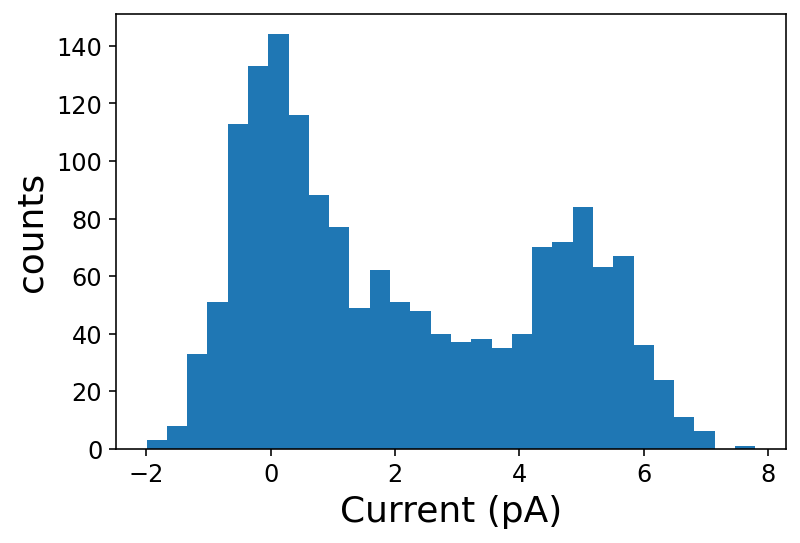

In [31]:
plt.hist(current_pA, 30);
plt.xlabel('Current (pA)')
plt.ylabel('counts');

There are at least three obvious peaks (levels) at roughly 0, 2 and 5 pA.

---
2. (3 pts) Write a function that takes as input an array of current values $x$ and an array of parameters $params$ and returns the probability density for each value of $x$ based on a probability distribution that is the weighted sum of as many normal distributions as there are current levels in the data.

In [33]:
def current_amp_pdf(x, params):
    mu1, mu2, mu3, sigma1, sigma2, sigma3, w1, w2, w3 = params
    # make sure weights sum to one
    netw = w1 + w2 + w3
    w1 /= netw
    w2 /= netw
    w3 = 1 - (w1 + w2)
    # the 3 normal distributions for the 3 levels
    N1 = st.norm(mu1, sigma1)
    N2 = st.norm(mu2, sigma2)
    N3 = st.norm(mu3, sigma3)
    # the weighted sum of the pdfs for each level
    return w1 * N1.pdf(x) + w2 * N2.pdf(x) + w3 * N3.pdf(x)

---
3. (3 pts) Write a function that takes as input an array of parameters $params$ and returns the negative loglikelihood of the data for the above probability distribution with the input parameters.

In [34]:
def negLL(params):
    pdf = current_amp_pdf(current_pA, params)
    return -np.sum(np.log(pdf))

---
4. (3 pts) Find the parameters to the above probability distribution that maximizes the likelihood of the observed current amplitudes.

In [35]:
# mu1, mu2, mu3, sigma1, sigma2, sigma3, w1, w2, w3
start = [0, 2, 5, 1, 1, 1, 0.4, 0.3, 0.3]
bnds = [(-1, 1), (1, 3), (4, 6), (0.01, 3), (0.01, 3), (0.01, 3), (0, 1), (0, 1), (0, 1)]

result = opt.minimize(negLL, start, method='slsqp', bounds=bnds)
result

/var/folders/k1/swt2sp1x6mj7wyc2cs76qq4m0000gn/T/ipykernel_60809/3784622666.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(pdf))


     fun: 3214.03671192214
     jac: array([ 0.00961304, -0.00134277, -0.00692749, -0.0088501 ,  0.00817871,
       -0.00585938,  0.0168457 , -0.0093689 , -0.01208496])
 message: 'Optimization terminated successfully'
    nfev: 179
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([-0.04865722,  1.85084892,  5.02660684,  0.6224217 ,  1.15835038,
        0.8109026 ,  0.4407558 ,  0.34219461,  0.35084986])

In [36]:
params = result.x

---
5. (3 pts) Plot the distribution of current amplitudes overlaid with the maximum likelihood model probability distribution.

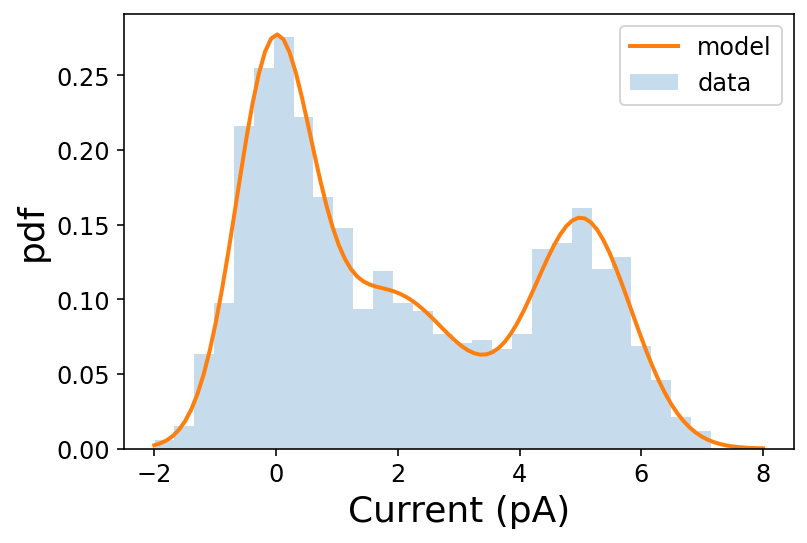

In [38]:
plt.hist(current_pA, 30, density=True, alpha=0.25, label='data');
x = np.linspace(-2, 8, 100);
plt.plot(x, current_amp_pdf(x, params), lw=2, label='model')
plt.xlabel('Current (pA)')
plt.ylabel('pdf')
plt.legend();